In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('clean-earnings-data/Consolidate-PLs-melted.csv')

In [6]:
jnj = df.query('Ticker == "JNJ"')

In [9]:
jnj_plot = jnj.query('`P&L Item` == "Revenue" | `P&L Item` == "Gross Margin" | `P&L Item` == "Operating Income" | `P&L Item` == "Net Income"')

In [10]:
jnj_plot

,P&L Item,Company,Ticker,Year,Value
0,Revenue,Johnson & Johnson,JNJ,2020,82584.0
2,Gross Margin,Johnson & Johnson,JNJ,2020,54157.0
7,Operating Income,Johnson & Johnson,JNJ,2020,19733.0
16,Net Income,Johnson & Johnson,JNJ,2020,14714.0
88,Revenue,Johnson & Johnson,JNJ,2021,93775.0
90,Gross Margin,Johnson & Johnson,JNJ,2021,63920.0
95,Operating Income,Johnson & Johnson,JNJ,2021,23647.0
104,Net Income,Johnson & Johnson,JNJ,2021,20878.0
176,Revenue,Johnson & Johnson,JNJ,2022,94943.0
178,Gross Margin,Johnson & Johnson,JNJ,2022,63854.0


<Figure size 2000x1000 with 0 Axes>

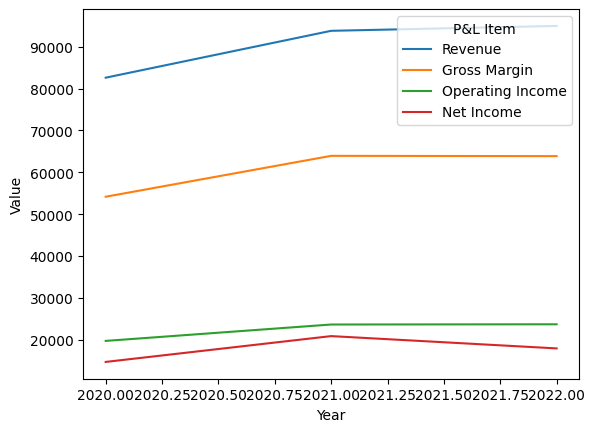

<Figure size 2000x1000 with 0 Axes>

In [11]:
# plot a line chart of jnj gross margin, operating margin, and net margin and make fig size 20, 10
sns.lineplot(data=jnj_plot, x='Year', y='Value', hue='P&L Item')
plt.figure(figsize=(20,10))

In [ ]:
after = df.melt(id_vars=['P&L Item', 'Company', 'Ticker'], var_name='Year', value_name='Value')
after = after.sort_values(by=['P&L Item', 'Company', 'Ticker', 'Year'])
after['Year'] = after['Year'].astype(int)

In [ ]:
margins = df.query('`P&L Item` == "Gross Margin %" | `P&L Item` == "Operating Margin %" | `P&L Item` == "Net Margin %"').copy()

In [ ]:
sns.set_style('darkgrid')
sns.catplot(col='P&L Item', x='Year', y='Value',data=margins.reset_index(), kind='bar', hue='Company', height=5, aspect=1.5, palette='rocket', legend='auto')

In [ ]:
sns.catplot(col='P&L Item', x='Company', y='Value',data=margins.reset_index(), kind='bar', hue='Year', height=5, aspect=1.5, palette='rocket', legend='auto')

In [ ]:
sns.catplot(x='P&L Item', y='Value', data=margins.reset_index(), kind='bar', col='Company', height=6, aspect=0.8, errorbar=None, palette='rocket')
plt.xlabel('P&L Item')
plt.show()